In [64]:
import SD_NC_loading as sdl
import matplotlib.pyplot as plt
import numpy as np
import dalecLoad as dl

In [39]:
S2_directory = ('C:/Users/daa5/OneDrive - University of Stirling/' + 
                'S2-data/acolite_output/')

coord_deep = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch

S2_df = sdl.load_multiple_SDs(S2_directory, coord_deep, skipSameDay=False, dateOnly=True)

In [77]:
planet_dir = ('C:/Users/daa5/OneDrive - University of Stirling/PlanetData/' + 
              'Airthrey_8-20Aug-TOAR_psscene_analytic_8b_udm2/acolite_output/')

SD_df = sdl.load_multiple_SDs(planet_dir, coord_deep, dateOnly=True)

...skipping duplicate date entry on 2022-08-11 (set skipSameDay=False to disable this)
...skipping duplicate date entry on 2022-08-17 (set skipSameDay=False to disable this)


In [78]:
SD_df.index.dtypes

Date           object
Wavelength    float64
dtype: object

KeyError: 'Channel'

In [51]:
DF = SD_df.join(S2_df, on='Date')
DF

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [62]:
def multiDaySpectraPlot(superDuperDF, DALEC_param='Rrs_median', SD_col_slice=slice(1, None, 1),
                        S2_df=None, figsize=None, SD_label='SD_Spectra', S2_label='S2_Spectra',
                        ylim=None, xlim=None, grid=True, show_plot=True):
    '''
    takes a DF, superDuperDF, with columns 'Date', 'Wavelength', DALEC_param, and SD data which is selected using SD_col_slice
    superDuperDF can be created with join_DALEC_SD_dfs()
    
    adding functionality for inputing a S2 df too! (eg. which can be loaded via load_multiple_SDs())
    
    set DALEC_param to None if DALEC data isn't wanted on plot
    
    generates a series of Rrs vs wavelength plots for each date in the DF 
    '''
    # if I want more flexibility then I could try using some **kwargs?
    # would need to decide which plot call these would be for... - both?

    n_dates = len(superDuperDF.index.get_level_values(0).unique())
    n_rows = int(np.sqrt(n_dates)//1)
    n_cols = int(np.ceil(n_dates/n_rows))
    
    if figsize is None:
        figsize = (n_cols * 4, n_rows*4)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)
    ax = ax.flatten()

    for i, date in zip(range(n_dates), superDuperDF.index.get_level_values(0).unique()):
        x = superDuperDF.index.get_level_values(1).unique()
        if DALEC_param is not None:
            y = superDuperDF.loc[[date]][DALEC_param].values
            ax[i].plot(x, y, label=DALEC_param)
        for col in list(superDuperDF.columns.values)[SD_col_slice]:
            y = superDuperDF.loc[[date]][col].values
            ax[i].plot(x, y,
                       color='red',
                       label=SD_label,
                       marker='o',
                       alpha=0.2)
        if S2_df is not None:
            x_s2 = S2_df.index.get_level_values(1).unique()
            for col in list(S2_df.columns.values):
                try:
                    y = S2_df.loc[[date]][col].values
                    ax[i].plot(x_s2, y,
                               color='cyan',
                               label=S2_label,
                               marker='o',
                               alpha=0.2)
                except KeyError:
                    pass
        if ylim is None:
            ylim = [0., superDuperDF.max(axis=0).max()*1.1]
        if xlim is None:
            xlim = [400., max(x)*1.1]
        ax[i].set_ylim(ylim)
        ax[i].set_xlim(xlim)
            
        ax[i].set_title(str(date))

        ax[i].set_xlabel('Wavelength (nm)')
        ax[i].set_ylabel('$R_{rs}$ $(sr^{-1}$)')

        # this code removes duplicate labels in the legend. Naughty
        handles, labels = ax[i].get_legend_handles_labels()
        newLabels, newHandles = [], []
        for handle, label in zip(handles, labels):
            if label not in newLabels:
                newLabels.append(label)
                newHandles.append(handle)
        ax[i].legend(newHandles, newLabels)
        if grid:
            ax[i].grid()
    plt.tight_layout()
    if show_plot:
        plt.show()
    return fig, ax

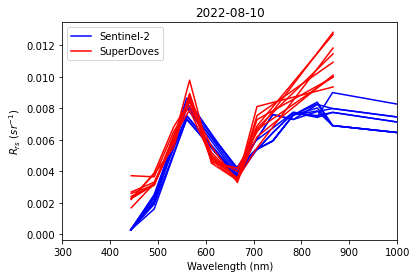

In [34]:
x = S2_df.index.get_level_values(1).unique()
date = S2_df.index.get_level_values(0).unique()
for col in list(S2_df.columns.values):
    y = S2_df.loc[date][col].values
    plt.plot(x, y, color='blue', label='Sentinel-2')
    
x = SD_df.index.get_level_values(1).unique()
date = SD_df.index.get_level_values(0).unique()[0]

for col in list(SD_df.columns.values):
    y = SD_df.loc[[date]][col].values
    plt.plot(x, y, color='red', label='SuperDoves')
    
plt.xlim([300, 1000])

ax = plt.gca()

ax.set_title(str(date)[:10])

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$R_{rs}$ $(sr^{-1}$)')

# this code removes duplicate labels in the legend. Naughty
handles, labels = ax.get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
ax.legend(newHandles, newLabels)
plt.show()

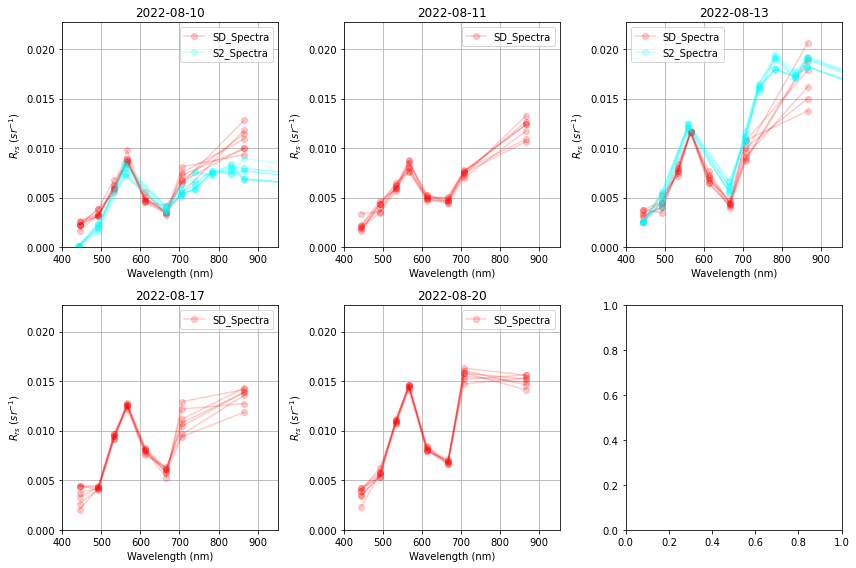

(<Figure size 864x576 with 6 Axes>,
 array([<AxesSubplot:title={'center':'2022-08-10'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-11'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-13'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-17'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:title={'center':'2022-08-20'}, xlabel='Wavelength (nm)', ylabel='$R_{rs}$ $(sr^{-1}$)'>,
        <AxesSubplot:>], dtype=object))

In [63]:
multiDaySpectraPlot(SD_df, DALEC_param=None, SD_col_slice=slice(1, -1, 1),
                        S2_df=S2_df, figsize=None, SD_label='SD_Spectra', S2_label='S2_Spectra',
                        ylim=None, grid=True, show_plot=True)

In [65]:
DALEC_df = dl.load_DALEC_dir('data/Jul-Aug/')

loading ... data/Jul-Aug/DALEC_71.dtf
loading ... data/Jul-Aug/DALEC_72_73.dtf
loading ... data/Jul-Aug/LOG_0082.dtf
loading ... data/Jul-Aug/LOG_0083.dtf
loading ... data/Jul-Aug/LOG_0084.dtf
loading ... data/Jul-Aug/LOG_0085.dtf
loading ... data/Jul-Aug/LOG_0086.dtf
loading ... data/Jul-Aug/LOG_0087.dtf
loading ... data/Jul-Aug/LOG_0088.dtf
loading ... data/Jul-Aug/LOG_0089.dtf


In [66]:
result = dl.resampleMultiLog(DALEC_df, method='median', freq='1D')
dalec_daily = dl.uniform_grid_spectra_multi(result, resample_to_SDs=True)
dalec_daily

Rrs_median
Date       Wavelength            
2022-07-28 444.0         0.001631
           492.0         0.002873
           533.0         0.005681
           566.0         0.007029
           612.0         0.005190
...                           ...
2022-08-15 566.0         0.012299
           612.0         0.008237
           666.0         0.006802
           707.0         0.011138
           866.0         0.001135

[88 rows x 1 columns]

In [67]:
superDF = sdl.join_DALEC_SD_dfs(dalec_daily, SD_df)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [73]:
SD_df.index.dtypes

Date           object
Wavelength    float64
dtype: object